In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [2]:
data_path = '/cluster/projects/vc/data/mic/open/MSD'
tasks = [x for x in os.listdir(data_path) if x.startswith('Task')]

# Check if the path exists
if os.path.exists(data_path):
    # List all directories that start with 'Task'
    tasks = [x for x in os.listdir(data_path) if x.startswith('Task') and os.path.isdir(os.path.join(data_path, x))]
else:
    print(f"Path {data_path} does not exist!")


- imagesTr: Training images.
- imagesTs: Test images (without ground truth segmentations).
- labelsTr: Ground truth segmentations for the training images.
- dataset.json: Metadata and information about the dataset.

Task:  Task09_Spleen
num_train = 41, num_test = 20
Image Min-Max values: Image=1166.0,-1024.0 and label=1.0,0.0
Number of subclasses =  2
noe


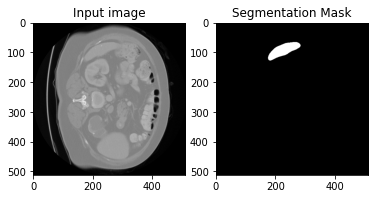



Task:  Task01_BrainTumour
num_train = 484, num_test = 266


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image Min-Max values: Image=3840.0,0.0 and label=3.0,0.0
Number of subclasses =  4
noe


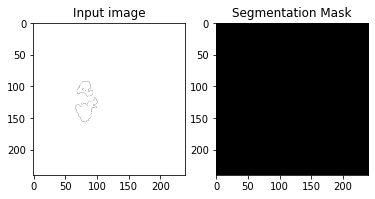



Task:  Task05_Prostate
num_train = 32, num_test = 16
Image Min-Max values: Image=2754.0,0.0 and label=2.0,0.0
Number of subclasses =  3


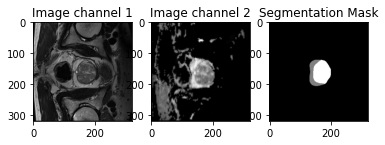

Task:  Task10_Colon
num_train = 0, num_test = 0
something didnt work
Task:  Task08_HepaticVessel
num_train = 303, num_test = 140
Image Min-Max values: Image=1369.0,-1024.0 and label=2.0,0.0
Number of subclasses =  3
noe


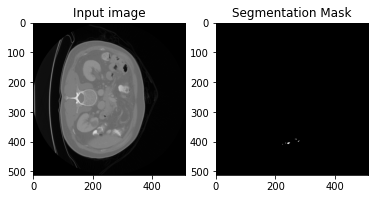



Task:  Task06_Lung
num_train = 63, num_test = 32
Image Min-Max values: Image=3071.0,-1024.0 and label=1.0,0.0
Number of subclasses =  2
noe


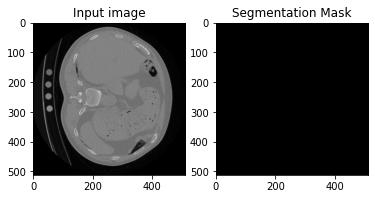



Task:  Task04_Hippocampus
num_train = 260, num_test = 130
Image Min-Max values: Image=3840.705810546875,0.0 and label=2.0,0.0
Number of subclasses =  3
noe


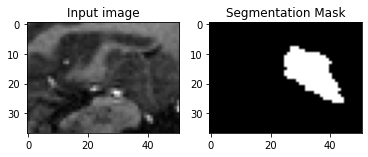



Task:  Task02_Heart
num_train = 20, num_test = 10
Image Min-Max values: Image=2058.0,0.0 and label=1.0,0.0
Number of subclasses =  2
noe


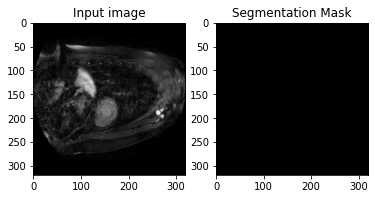



Task:  Task03_Liver
num_train = 131, num_test = 70
Image Min-Max values: Image=1623.0,-1024.0 and label=2.0,0.0
Number of subclasses =  3
noe


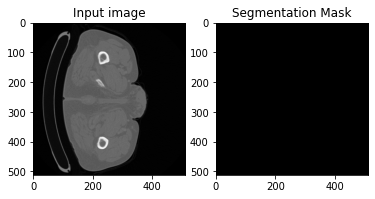



Task:  Task07_Pancreas
num_train = 281, num_test = 139
Image Min-Max values: Image=1432.0,-1024.0 and label=2.0,0.0
Number of subclasses =  3
noe


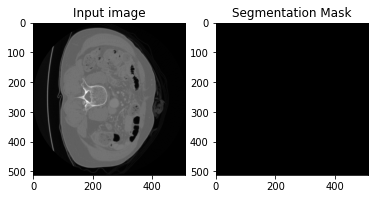

In [15]:
for task in tasks:
    print('Task: ', task)

    # Paths
    path_training = os.path.join(data_path, task, 'imagesTr')
    path_test = os.path.join(data_path, task, 'imagesTs')
    path_gt = os.path.join(data_path, task, 'labelsTr')

    if os.path.exists(path_training):
        imglist_training = glob(os.path.join(path_training, '*.nii.gz'))
        imglist_gt = glob(os.path.join(path_gt, '*.nii.gz'))
        imglist_test = glob(os.path.join(path_test, '*.nii.gz'))
    else:
        print(f"Directory {path_training} does not exist!")

    print('num_train = {}, num_test = {}'.format(len(imglist_training), len(imglist_test)))

    # Images
    try: 
        img = nib.load(imglist_training[0]).get_fdata()
        label = nib.load(imglist_gt[0]).get_fdata()
        print('Image Min-Max values: Image={},{} and label={},{}'.format(img.max(), img.min(), label.max(), label.min()))
        print('Number of subclasses = ', int(label.max())+1)
        
        if task=='Task05_Prostate':
            ax = plt.subplot(1,3,1)
            ax.imshow(img[:,:,10,0], cmap='gray')
            ax.set_title('Image channel 1')
            ax = plt.subplot(1,3,2)
            ax.imshow(img[:,:,10,1], cmap='gray')
            ax.set_title('Image channel 2')
            ax = plt.subplot(1,3,3)
            ax.imshow(label[:,:,10], cmap='gray')
            ax.set_title('Segmentation Mask')
            plt.show()
        else:
            ax = plt.subplot(1,2,1)
            ax.imshow(img[:,:,10], cmap='gray')
            ax.set_title('Input image')
            ax = plt.subplot(1,2,2)
            ax.imshow(label[:,:,10], cmap='gray')
            ax.set_title('Segmentation Mask')
            plt.show()
            print('\n')
    except:
        print('something didnt work')